In [111]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import copy as cp

In [112]:
df = pd.read_csv("/Users/jane/Desktop/MetObjects.csv") 

/Users/jane/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (7,8,9,10,11,18,27,28,29,30,31,32,33,34,35,36,37,39) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [113]:
print(df.head())

  Object Number  Is Highlight  Is Public Domain  Object ID  \
0    1979.486.1         False             False          1   
1    1980.264.5         False             False          2   
2      67.265.9         False             False          3   
3     67.265.10         False             False          4   
4     67.265.11         False             False          5   

                 Department Object Name                         Title Culture  \
0  American Decorative Arts        Coin  One-dollar Liberty Head Coin     NaN   
1  American Decorative Arts        Coin  Ten-dollar Liberty Head Coin     NaN   
2  American Decorative Arts        Coin    Two-and-a-Half Dollar Coin     NaN   
3  American Decorative Arts        Coin    Two-and-a-Half Dollar Coin     NaN   
4  American Decorative Arts        Coin    Two-and-a-Half Dollar Coin     NaN   

  Period Dynasty                    ...                    Subregion Locale  \
0    NaN     NaN                    ...                      

file_path="/Users/jane/Desktop/MetObjects.csv"
with open(file_path) as file_object:
    contents = file_object.read() 
    print(contents)

a=df.

In [114]:
df.shape

(468947, 43)

In [115]:
df_copy=cp.copy(df)

In [116]:
time=np.unique(df['Object End Date'])

In [117]:
len(time)

2074

In [118]:
max(time)

18591861

In [119]:
min(time)

-35000

In [120]:
problem=df[df['Object End Date']>2018]
len(problem)

242

In [121]:
len(df)

468947

In [122]:
problem_plt=problem.iloc[:,22:24]

In [123]:
problem_plt.plot.scatter(x='Object End Date',y='Object Begin Date')

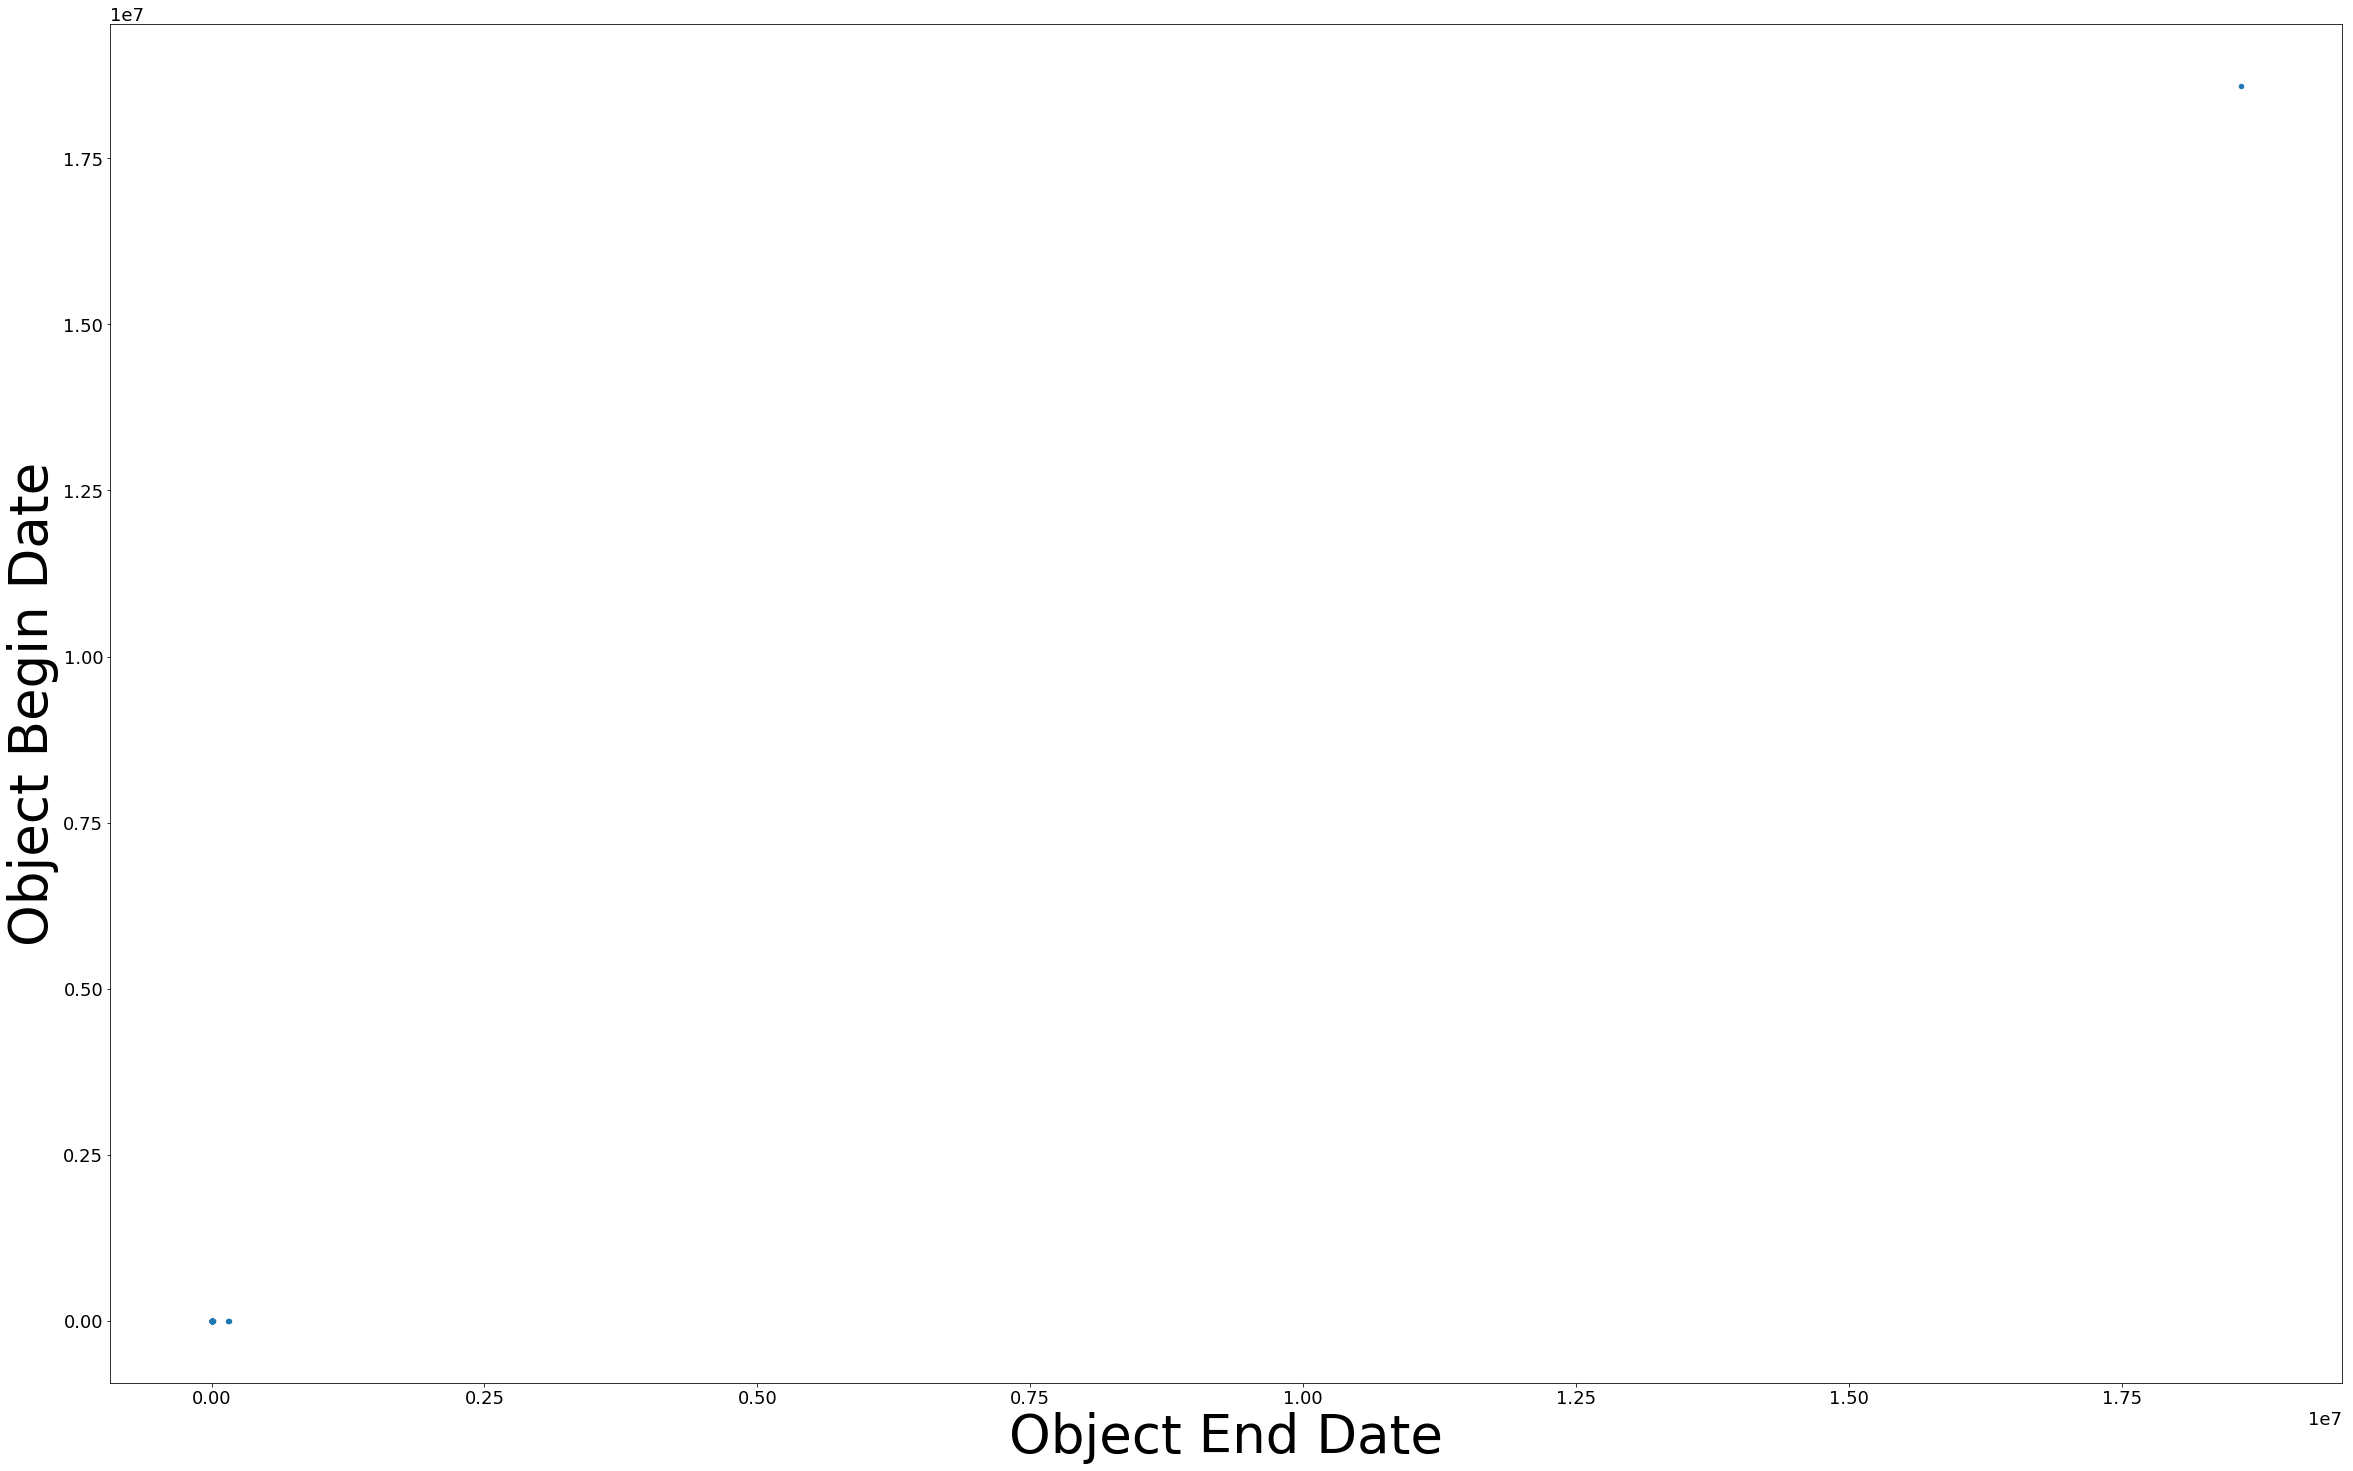

In [124]:
plt.show()

In [125]:
time2=np.unique(df['Object Begin Date'])

In [126]:
len(time2)

2102

In [127]:
max(time2)

18591861

In [128]:
min(time2)

-95000

In [129]:
b=df[df['Object Begin Date']==-95000]
b.iloc[:,22:24]

,Object Begin Date,Object End Date
377063,-95000,-35000


# Department Mapping

In [130]:
Departments=df.iloc[:,4].value_counts()

In [131]:
Departments=pd.DataFrame(Departments)
Departments

,Department
Drawings and Prints,171026
European Sculpture and Decorative Arts,42954
Photographs,38796
Asian Art,37302
Costume Institute,31368
Egyptian Art,27560
American Decorative Arts,18372
Greek and Roman Art,17431
Islamic Art,15770
Modern and Contemporary Art,14519


In [132]:
import squarify

In [133]:
#Adjust size
SMALL_SIZE = 15
MEDIUM_SIZE = 18
BIGGER_SIZE = 53

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)     # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels 此处无用
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)   # fontsize of the figure title

In [134]:
# Another way of Large Plot
plt.rcParams['figure.figsize'] = (40.0, 25.0)

In [135]:
#Utilise matplotlib to scale our goal numbers between the min and max, then assign this scale to our values.
matplotlib.colors.Normalize(vmin=min(Departments), vmax=max(Departments))
colors = [plt.cm.Blues(Departments) for value in Departments.index]

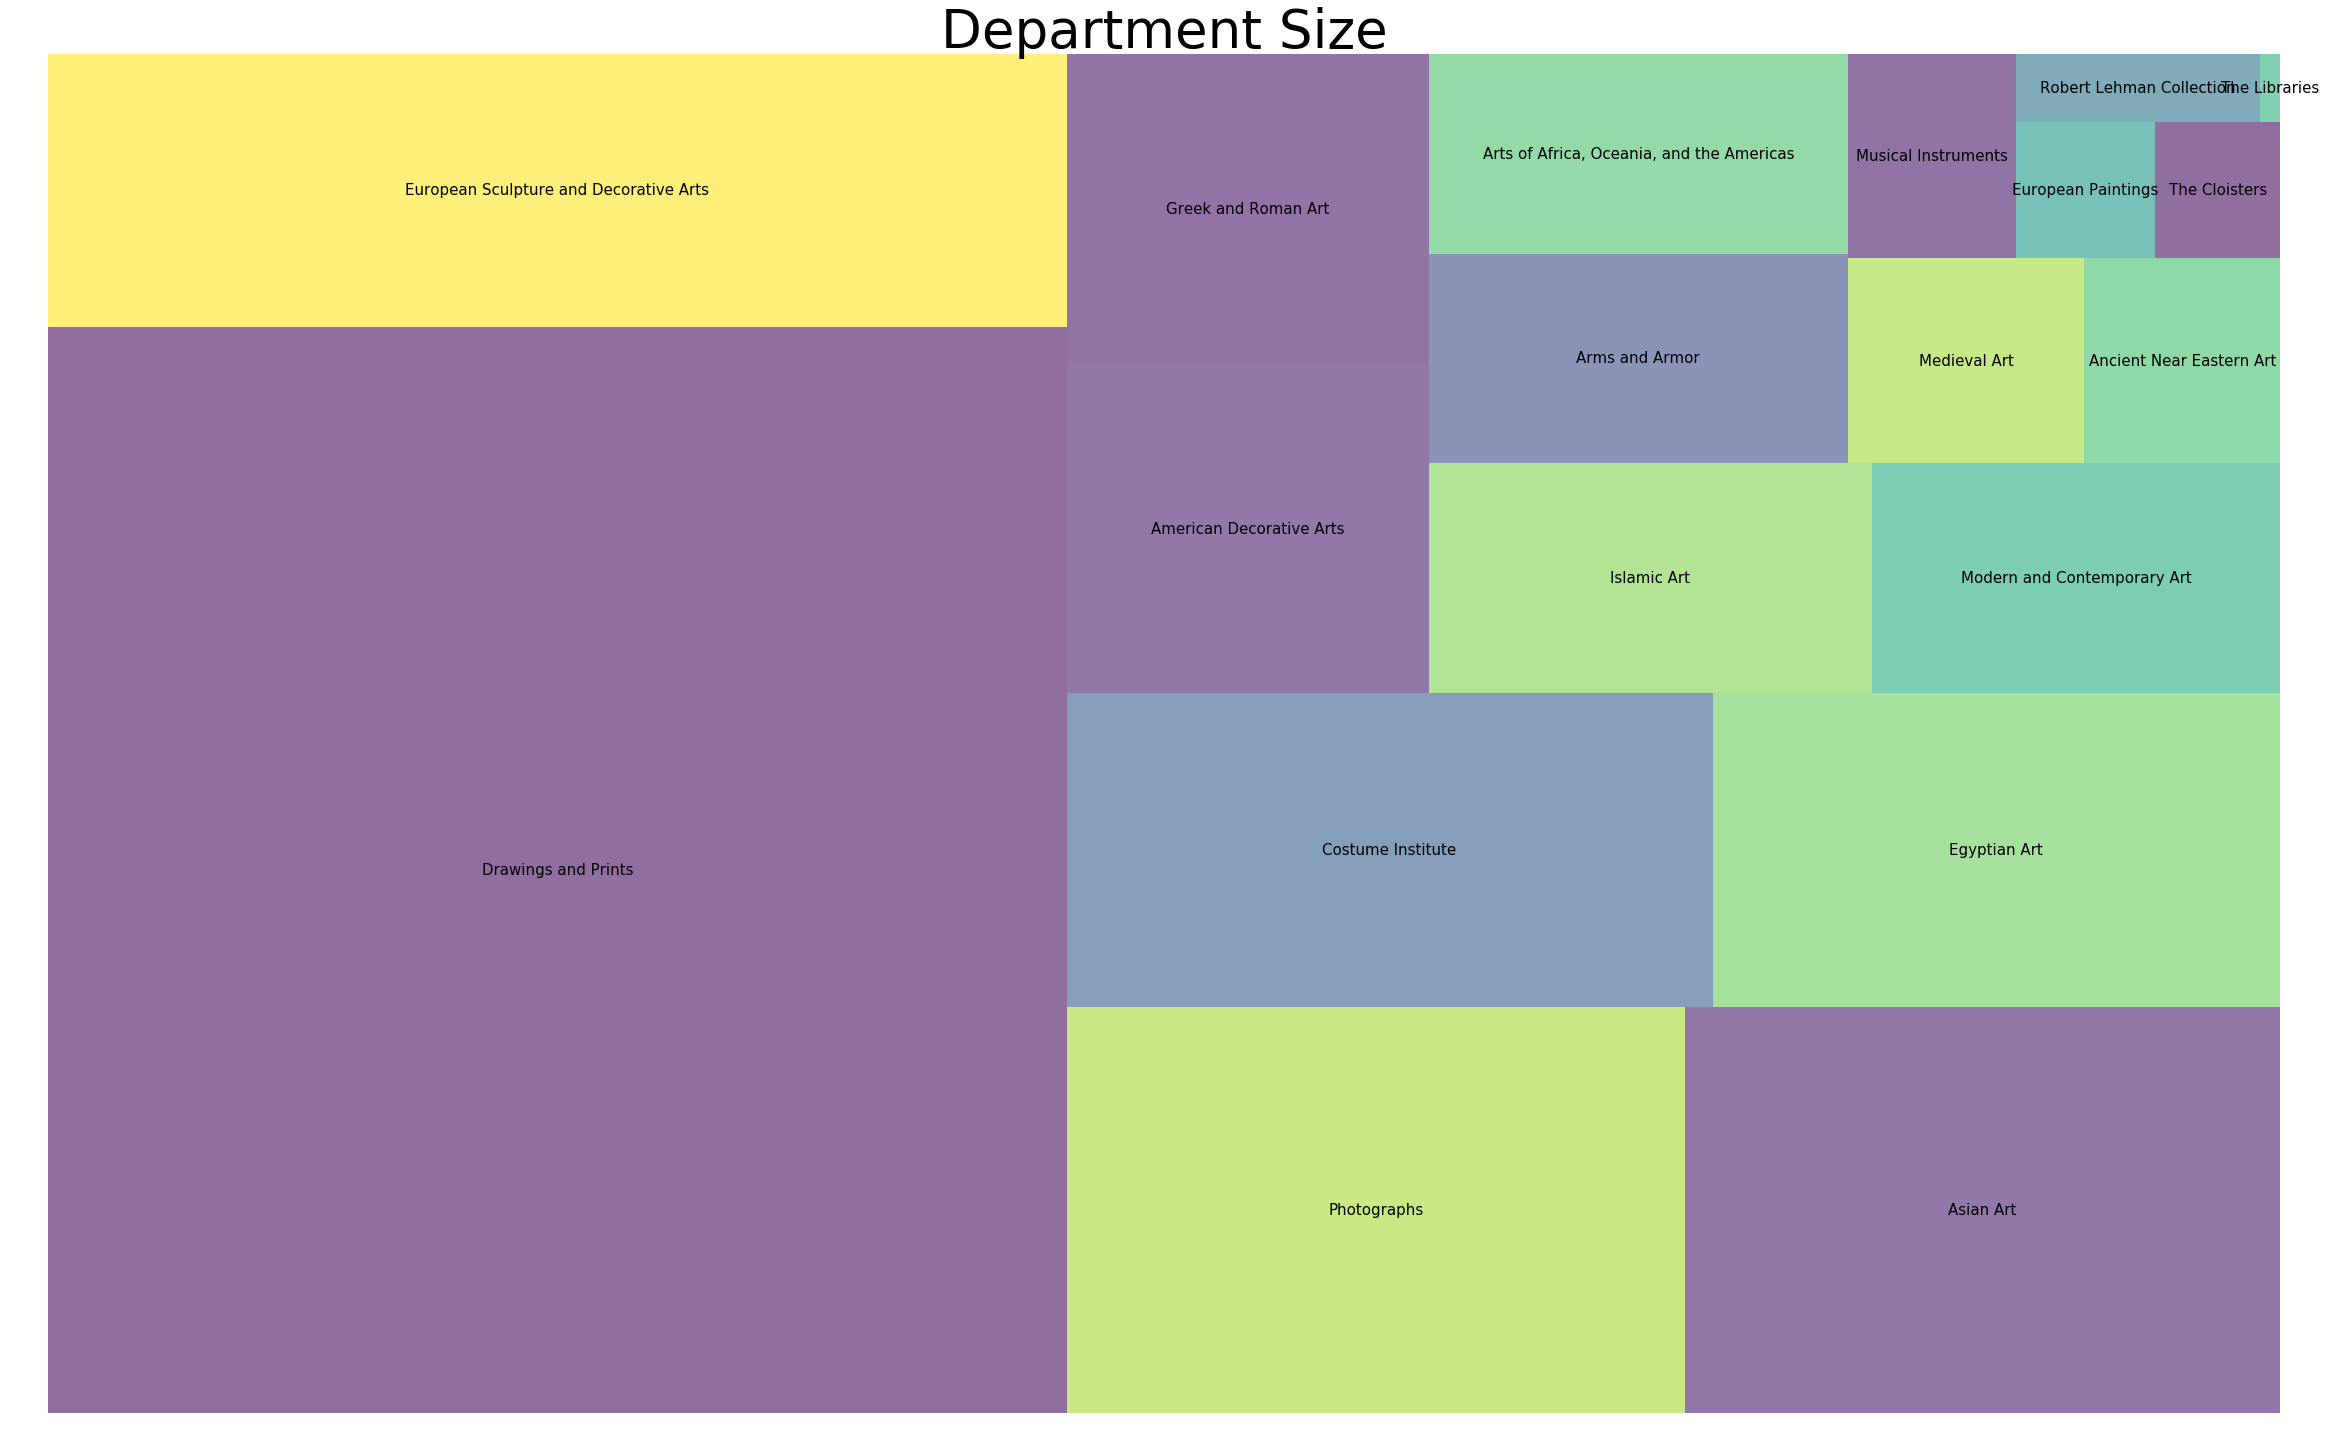

In [136]:
#Treemap
squarify.plot(sizes=Departments['Department'], label=Departments.index, alpha=.6)
plt.title("Department Size")
plt.axis('off')
plt.show()


# Geographic Mapping

I want to examine the distribution of objects by country. Based on the observation from column names, I can analyze Culture or Country column. Since there are too many missing values, I need to decide which one to pick. 


In [137]:
df.shape

(468947, 43)

In [138]:
#np.count_nonzero(~np.isnan(df.Culture))
culture=df.Culture.dropna()
culture.shape

(192115,)

In [139]:
country=df.Country.dropna()
country.shape

(76108,)

In [140]:
#Roughly checking the dataset, it seems that the culture name starts from the first word.
#Extract first word in culture column.
c_1=culture.str.split()
c_1=c_1.str.get(0)
c_1.value_counts()
#There is no culture name probably or possibly. I need to check the characteristics of these columns further.

American           30750
French             18794
Japan              16604
China              14178
Italian             7109
British             6086
Japanese            6011
German              4972
Roman               4918
British,            4585
French,             4219
Italian,            3856
Greek,              3514
European            3390
Cypriot             2923
German,             2782
probably            2357
Spanish             1753
Coptic              1671
possibly            1615
Greek               1549
India               1433
Indonesia           1276
Chinese,            1205
Chinese             1099
Iran                1088
Sasanian            1014
Etruscan             984
Dutch                982
Mexican              887
                   ...  
Woodlands              1
Island                 1
Inland                 1
Brussels               1
Mali;                  1
Mohawk                 1
Timbuktu               1
Espiritu               1
Chilean                1


In [141]:
# I only printed first 10 rows because space is limited, but the position of probably changes case by case. 
# For simplicity, I deleted the word probably&possibly
culture[culture.str.contains('probably')].head(3)

399      Dutch, probably
519    British, probably
575    British, probably
Name: Culture, dtype: object

In [142]:
culture[culture.str.contains('possibly')].head(5)

666       British, possibly
804        French, possibly
1570    Bermudian, possibly
1571    Bermudian, possibly
1775      British, possibly
Name: Culture, dtype: object

In [143]:
culture=culture.str.replace('probably?', '')
culture=culture.str.replace('possibly?', '')

In [144]:
#Extract first word in culture column
c_1=culture.str.split()
c_1=c_1.str.get(0)
c_1

14                Mexican
15                Mexican
16                Mexican
17                Mexican
18                Mexican
19                Mexican
20                Mexican
21             Guatemalan
22             Guatemalan
23                Mexican
24                Mexican
25                Mexican
26                Mexican
27                Mexican
28                Mexican
29                Mexican
30                Mexican
31                Mexican
32               American
33               American
34               American
35               American
36                British
37                British
38               American
39               American
40               American
41               American
42               American
59               American
               ...       
465710           American
465792            Indian,
465793            Indian,
465794       Anglo-Indian
466095    Greco-Egyptian,
466121             French
466122             French
466336      

In [145]:
# Count unique values in culture
c_1=c_1.str.replace(',', '')
c_1=c_1.str.replace('China', 'Chinese')
c_1=c_1.value_counts()
#c_1.replace('China','Chinese')
c_1

American           31519
French             24109
Japan              16606
Chinese            16527
Italian            11325
British            11065
German              8131
Japanese            6117
Roman               5498
Greek               5076
European            3715
Cypriot             2923
Spanish             2248
Coptic              1671
India               1470
Dutch               1439
Indonesia           1283
Indian              1154
Iran                1090
Russian             1090
Etruscan            1039
Sasanian            1014
Austrian             965
Flemish              950
Mexican              898
Frankish             798
Minoan               776
Moche                728
Asmat                651
Korea                649
                   ...  
Russia;                1
Afghanistani           1
Paris                  1
Gope                   1
Nyaura                 1
Mono                   1
Confederated           1
e                      1
Los                    1


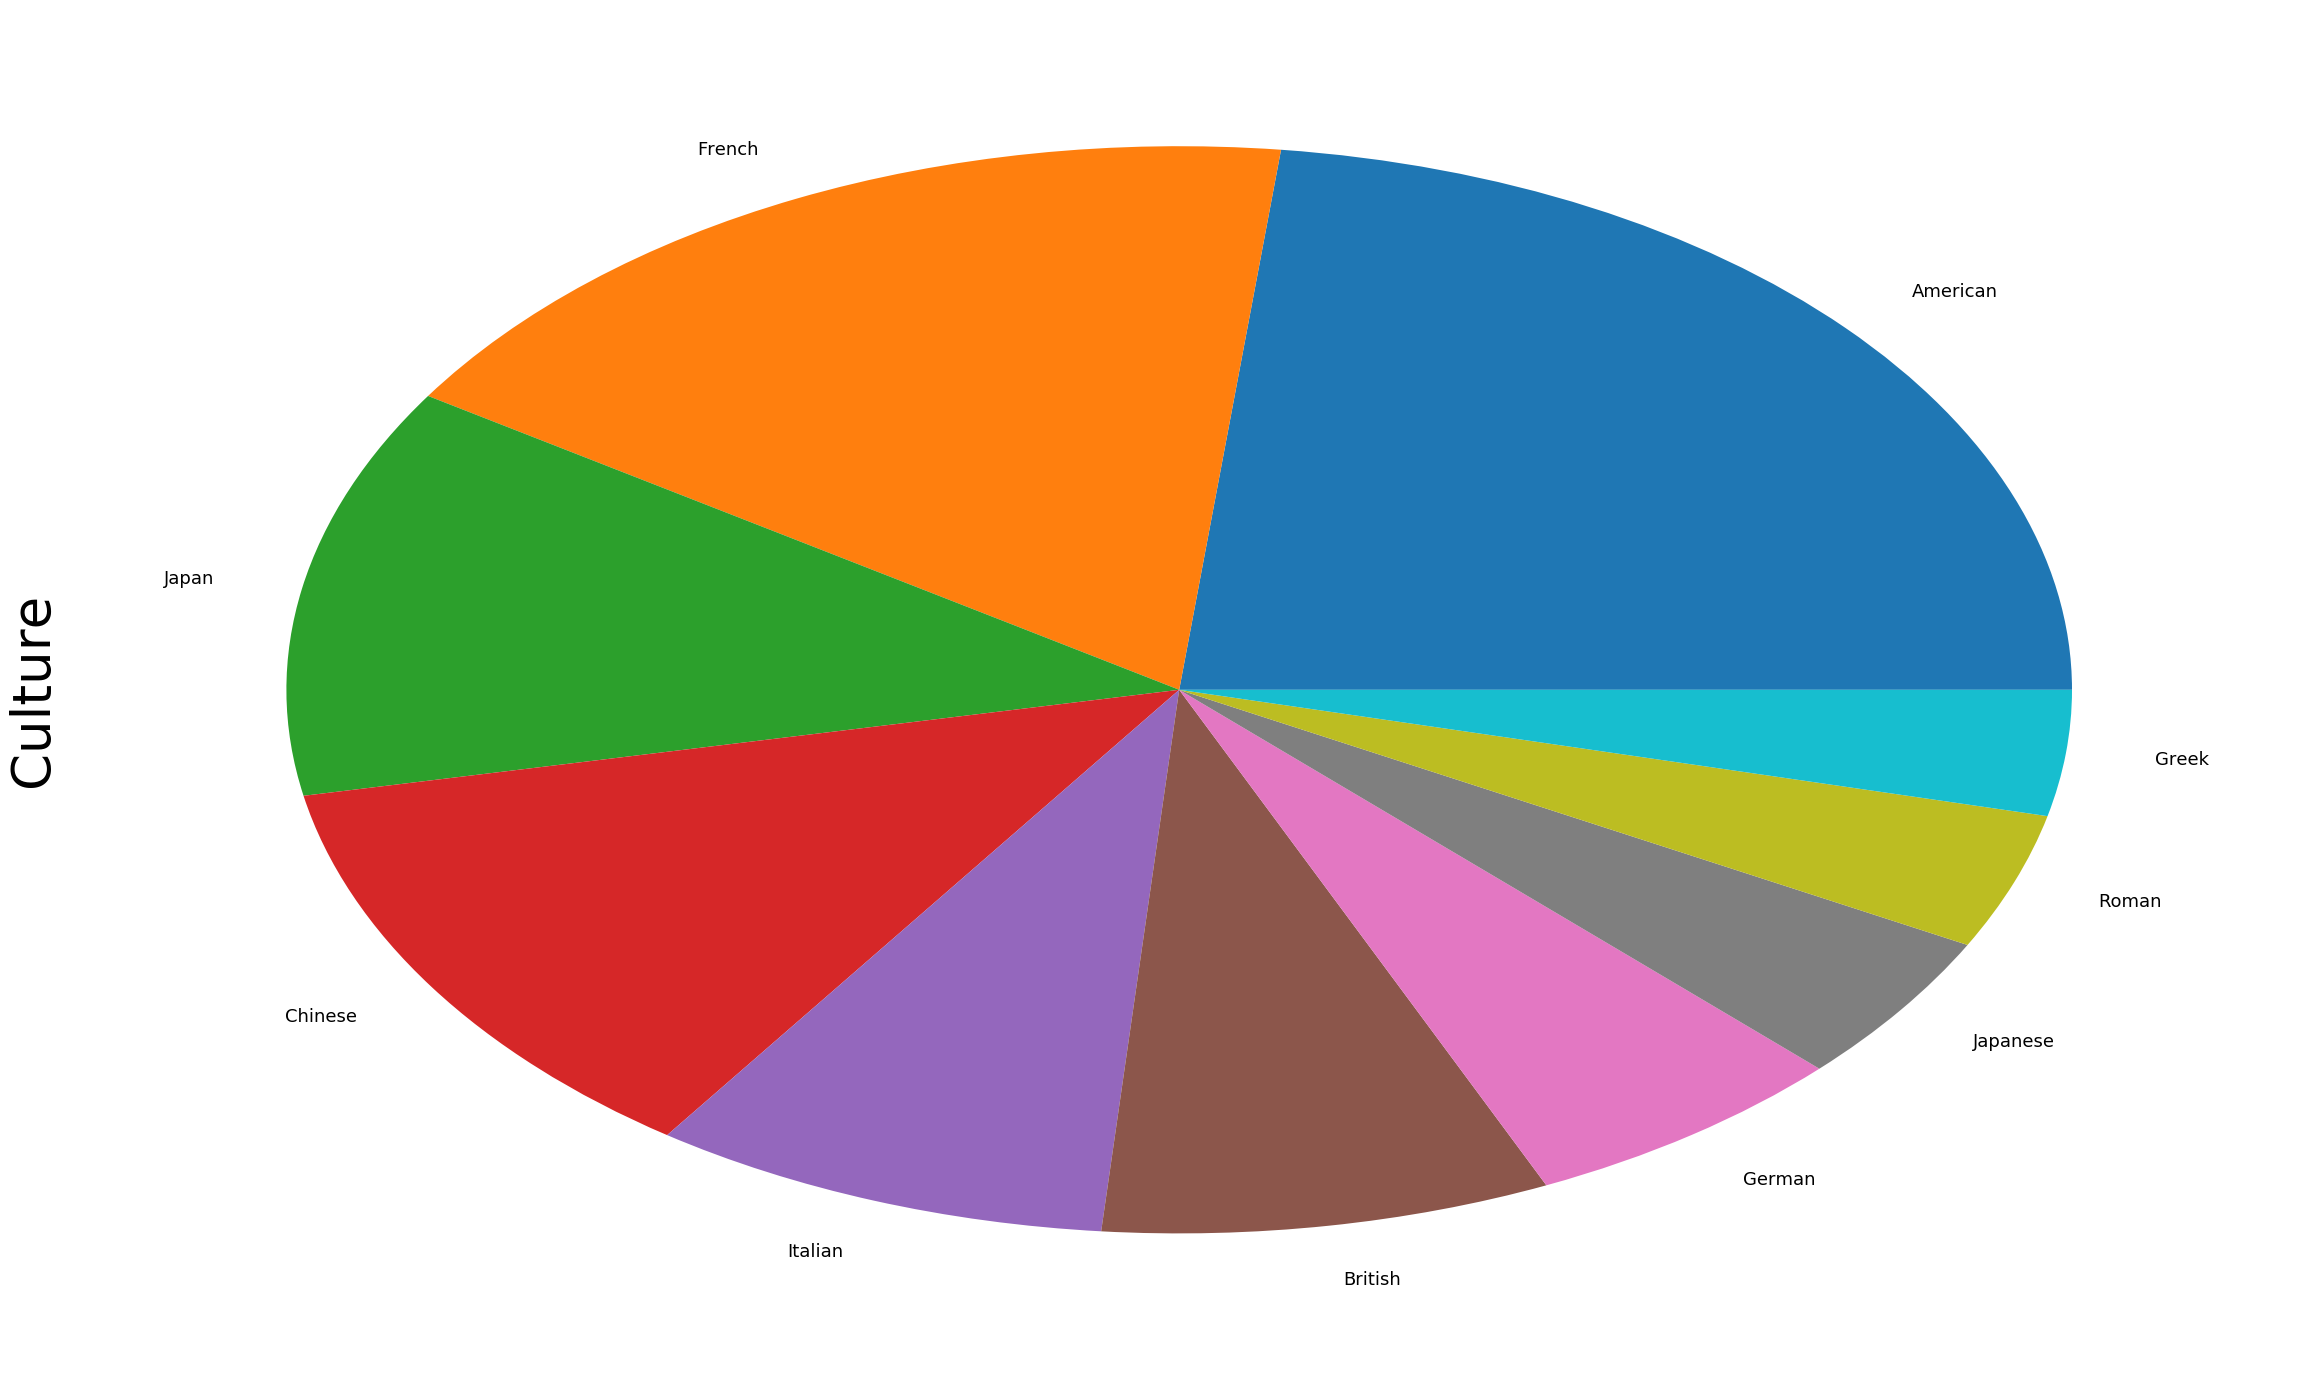

In [146]:
c_1.iloc[0:10].plot(kind='pie')
plt.show()

In [147]:
df_copy.head(10)

,Object Number,Is Highlight,Is Public Domain,Object ID,Department,Object Name,Title,Culture,Period,Dynasty,...,Subregion,Locale,Locus,Excavation,River,Classification,Rights and Reproduction,Link Resource,Metadata Date,Repository
0,1979.486.1,False,False,1,American Decorative Arts,Coin,One-dollar Liberty Head Coin,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Metal,NaN,http://www.metmuseum.org/art/collection/search/1,9/10/18 8:00,"Metropolitan Museum of Art, New York, NY"
1,1980.264.5,False,False,2,American Decorative Arts,Coin,Ten-dollar Liberty Head Coin,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Metal,NaN,http://www.metmuseum.org/art/collection/search/2,9/10/18 8:00,"Metropolitan Museum of Art, New York, NY"
2,67.265.9,False,False,3,American Decorative Arts,Coin,Two-and-a-Half Dollar Coin,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Metal,NaN,http://www.metmuseum.org/art/collection/search/3,9/10/18 8:00,"Metropolitan Museum of Art, New York, NY"
3,67.265.10,False,False,4,American Decorative Arts,Coin,Two-and-a-Half Dollar Coin,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Metal,NaN,http://www.metmuseum.org/art/collection/search/4,9/10/18 8:00,"Metropolitan Museum of Art, New York, NY"
4,67.265.11,False,False,5,American Decorative Arts,Coin,Two-and-a-Half Dollar Coin,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Metal,NaN,http://www.metmuseum.org/art/collection/search/5,9/10/18 8:00,"Metropolitan Museum of Art, New York, NY"
5,67.265.12,False,False,6,American Decorative Arts,Coin,Two-and-a-Half Dollar Coin,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Metal,NaN,http://www.metmuseum.org/art/collection/search/6,9/10/18 8:00,"Metropolitan Museum of Art, New York, NY"
6,67.265.13,False,False,7,American Decorative Arts,Coin,Two-and-a-Half Dollar Coin,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Metal,NaN,http://www.metmuseum.org/art/collection/search/7,9/10/18 8:00,"Metropolitan Museum of Art, New York, NY"
7,67.265.14,False,False,8,American Decorative Arts,Coin,Two-and-a-Half Dollar Coin,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Metal,NaN,http://www.metmuseum.org/art/collection/search/8,9/10/18 8:00,"Metropolitan Museum of Art, New York, NY"
8,67.265.15,False,False,9,American Decorative Arts,Coin,Two-and-a-Half Dollar Coin,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Metal,NaN,http://www.metmuseum.org/art/collection/search/9,9/10/18 8:00,"Metropolitan Museum of Art, New York, NY"
9,1979.486.3,False,False,10,American Decorative Arts,Coin,Two-and-a-half-dollar Indian Head Coin,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Metal,NaN,http://www.metmuseum.org/art/collection/search/10,9/10/18 8:00,"Metropolitan Museum of Art, New York, NY"


In [148]:
df_copy.keys()

Index(['Object Number', 'Is Highlight', 'Is Public Domain', 'Object ID',
       'Department', 'Object Name', 'Title', 'Culture', 'Period', 'Dynasty',
       'Reign', 'Portfolio', 'Artist Role', 'Artist Prefix',
       'Artist Display Name', 'Artist Display Bio', 'Artist Suffix',
       'Artist Alpha Sort', 'Artist Nationality', 'Artist Begin Date',
       'Artist End Date', 'Object Date', 'Object Begin Date',
       'Object End Date', 'Medium', 'Dimensions', 'Credit Line',
       'Geography Type', 'City', 'State', 'County', 'Country', 'Region',
       'Subregion', 'Locale', 'Locus', 'Excavation', 'River', 'Classification',
       'Rights and Reproduction', 'Link Resource', 'Metadata Date',
       'Repository'],
      dtype='object')

In [149]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 468947 entries, 0 to 468946
Data columns (total 43 columns):
Object Number              468947 non-null object
Is Highlight               468947 non-null bool
Is Public Domain           468947 non-null bool
Object ID                  468947 non-null int64
Department                 468947 non-null object
Object Name                465029 non-null object
Title                      437863 non-null object
Culture                    192115 non-null object
Period                     72794 non-null object
Dynasty                    22956 non-null object
Reign                      10883 non-null object
Portfolio                  21837 non-null object
Artist Role                279279 non-null object
Artist Prefix              95015 non-null object
Artist Display Name        280495 non-null object
Artist Display Bio         234272 non-null object
Artist Suffix              10733 non-null object
Artist Alpha Sort          280467 non-null object


In [150]:
#[int(s) for s in a.str.split() if s.isdigit()]

# Feature Engineering

In [151]:
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import decomposition, ensemble
#from keras.preprocessing import text, sequence
#from keras import layers, models, optimizers
#import xgboost as xgb
#numpy, textblob, string

In [209]:
# Check Outliers of Time
time_b=df['Object Begin Date']
# Normally, year column should have at least 4-5 digits. When checking year column with 1 digit, I found that all equal
# to zero, which should be a outlier and can't be taken into consideration.
#len(time[time.astype(str).str.len()==1]==0)
len(time_b[time_b.astype(str).str.len()==1])

3523

In [223]:
# Check Outliers of Time
time_b[time_b.astype(str).str.len()>6]

398550    18591861
Name: Object Begin Date, dtype: int64

In [280]:
# Convert 0 to NAN
time_b=time_b.replace(0, 'NAN')
time_b=time_b.replace("18591861", 1859)
type(time_b[0])

int

In [279]:
# Check Outliers of Time
#time[time.astype(str).str.len()==2]
# By observating original data, I found that year value between 10-20 represent century,for example, 11 century.
# Therefore, I multiple it by 100.
time_begin=[]
for i in time_b:
    if (i<20) & (i>10):
        i=i*100
    else:
        i=i
    time_begin=time_begin + [i]

TypeError: '<' not supported between instances of 'str' and 'int'

In [225]:
#time_b[(time_b<20) & (time_b>10)]

In [229]:
df['Object Begin Date']=time_b

In [249]:
Feature=df[['Classification','Department','Object Name','Object Begin Date','Medium']]

In [251]:
#dropna for Count Vectors
Feature.describe()

,Classification,Department,Object Name,Object Begin Date,Medium
count,412887,468947,465029,468947,461320
unique,1209,19,27662,2102,64405
top,Prints,Drawings and Prints,Print,1800,Commercial color lithograph
freq,74870,171026,97959,23100,22433


In [252]:
Feature = Feature.dropna()
Feature.describe()

,Classification,Department,Object Name,Object Begin Date,Medium
count,401724,401724,401724,401724,401724
unique,1197,18,18481,1918,56732
top,Prints,Drawings and Prints,Print,1800,Commercial color lithograph
freq,74322,166248,97678,20768,22433


In [265]:
# Text
X=Feature.iloc[:,1:]
# Label
y=Feature.iloc[:,0]

# 1. Count Vectors

In [266]:
# split the dataset into training and validation datasets 
from sklearn.model_selection import train_test_split
#文字也可归类为数字
from sklearn import preprocessing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# label encode the target variable 
le=preprocessing.LabelEncoder()
y_train=le.fit(y_train)
y_test=le.fit(y_test)

In [275]:
columns=['Department','Object Name','Object Begin Date','Medium']
for col in columns:
    

In [267]:
# Count Vectors as features
# create a count vectorizer object 
count_vect = CountVectorizer(stop_words='english', token_pattern=r'\w{1,}')
#count_vect=tfidf_vect = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', max_features=5000)
count_vect.fit(X)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern='\\w{1,}', tokenizer=None,
        vocabulary=None)

In [268]:
# transform the training and validation data using count vectorizer object
xtrain_count =  count_vect.transform(X_train)
xtest_count =  count_vect.transform(X_test)

In [269]:
array1=xtrain_count.toarray()
array1

array([[0, 0, 1, 0, 0],
       [0, 0, 0, 0, 1],
       [1, 1, 0, 0, 1],
       [0, 0, 0, 1, 0]])

In [274]:
#把数字转换回文字
count_vect.inverse_transform(array1[3])

[array(['medium'],
       dtype='<U10')]

In [260]:
count_vect.get_feature_names()

['begin', 'date', 'department', 'medium', 'object']

# 2. TF-IDF Vectors

In [261]:
#TF-IDF
tfidf_vect = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', max_features=5000)
tfidf_vect.fit(X)
xtrain_tfidf =  tfidf_vect.transform(X_train)
xtest_tfidf =  tfidf_vect.transform(X_test)

In [262]:
array2= xtrain_tfidf.toarray()
array2

array([[ 0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.78528828,
         0.6191303 ],
       [ 0.61761437,  0.61761437,  0.        ,  0.        ,  0.        ,
         0.48693426],
       [ 0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         0.        ]])

In [263]:
tfidf_vect.inverse_transform(array2[0])

[array(['department'],
       dtype='<U10')]

# 2.3 Word Embeddings

In [ ]:
# load the pre-trained word-embedding vectors 
embeddings_index = {}
for i, line in enumerate(open('⁨/Users⁩/jane⁩/Documents⁩/Python⁩⁩/wiki-news-300d-1M.vec')):
    values = line.split()
    embeddings_index[values[0]] = numpy.asarray(values[1:], dtype='float32')